In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [120]:
df = pd.read_parquet("yellow_tripdata_2023-01.parquet")

In [121]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.000,0.970,1.000,N,161,141,2,9.300,1.000,0.500,0.000,0.000,1.000,14.300,2.500,0.000
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.000,1.100,1.000,N,43,237,1,7.900,1.000,0.500,4.000,0.000,1.000,16.900,2.500,0.000
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.000,2.510,1.000,N,48,238,1,14.900,1.000,0.500,15.000,0.000,1.000,34.900,2.500,0.000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.000,1.900,1.000,N,138,7,1,12.100,7.250,0.500,0.000,0.000,1.000,20.850,0.000,1.250
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.000,1.430,1.000,N,107,79,1,11.400,1.000,0.500,3.280,0.000,1.000,19.680,2.500,0.000


In [122]:
df.shape

(3066766, 19)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [124]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [125]:
df.duplicated().sum()

0

In [126]:
df = df[df["passenger_count"].notnull()]

In [127]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [128]:
vendors = df["VendorID"].value_counts()

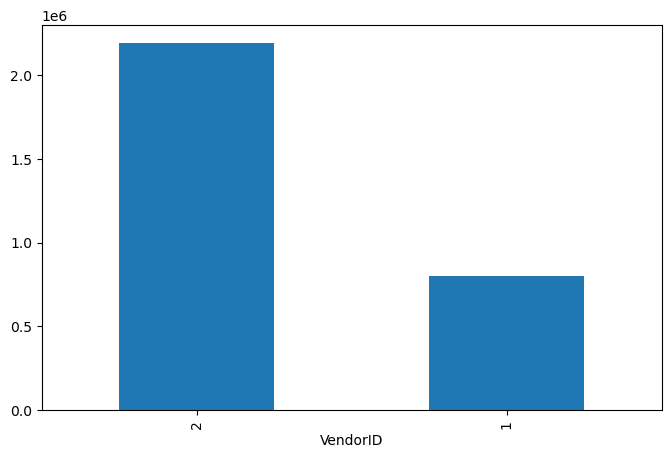

In [129]:
plt.figure(figsize=(8,5))
vendors.plot(kind="bar")
plt.show()

In [130]:
df["RatecodeID"].value_counts()

RatecodeID
1.000     2839305
2.000      114239
5.000       15043
99.000      13106
3.000        8958
4.000        4366
6.000           6
Name: count, dtype: int64

In [131]:
df["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    2975020
Y      20003
Name: count, dtype: int64

<Axes: xlabel='store_and_fwd_flag', ylabel='VendorID'>

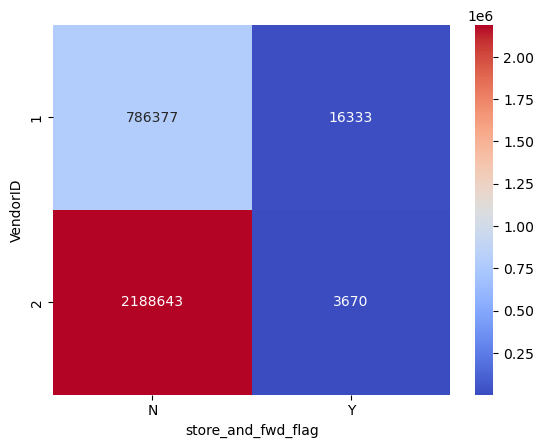

In [132]:
sns.heatmap(pd.crosstab(df["VendorID"],df["store_and_fwd_flag"]),annot=True,cmap='coolwarm',fmt="d")

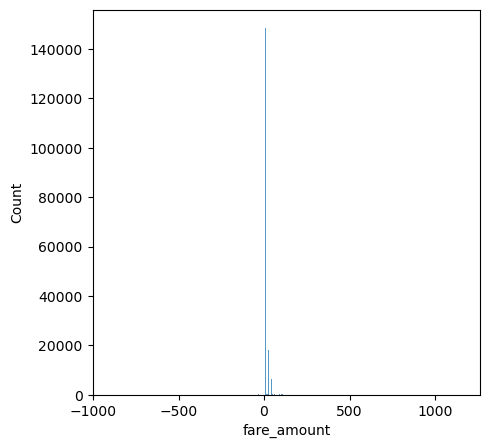

In [133]:
plt.figure(figsize=(5,5))
ax = sns.histplot(x=df["fare_amount"],kde=False)

In [134]:
df = df[df["trip_distance"]!=0]

In [135]:
print(df["trip_distance"].describe())

count   2956656.000
mean          3.481
std          42.362
min           0.010
25%           1.100
50%           1.800
75%           3.350
max       62359.520
Name: trip_distance, dtype: float64


In [136]:
vendor_distance = df.groupby("VendorID")["trip_distance"].sum()

In [137]:
vendor_distance

VendorID
1   2535420.600
2   7756073.880
Name: trip_distance, dtype: float64

In [138]:
df.columns[2]

'tpep_dropoff_datetime'

In [139]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
2.500     2728259
0.000      210001
-2.500      18396
Name: count, dtype: int64

In [140]:
df["total_amount"].describe()

count   2956656.000
mean         26.919
std          21.828
min        -603.500
25%          15.400
50%          20.050
75%          28.550
max        1169.400
Name: total_amount, dtype: float64

In [141]:
df["improvement_surcharge"].describe()

count   2956656.000
mean          0.984
std           0.175
min          -1.000
25%           1.000
50%           1.000
75%           1.000
max           1.000
Name: improvement_surcharge, dtype: float64

In [142]:
df["tolls_amount"].describe()

count   2956656.000
mean          0.517
std           2.002
min         -39.300
25%           0.000
50%           0.000
75%           0.000
max          92.750
Name: tolls_amount, dtype: float64

In [143]:
df["tip_amount"].describe()

count   2956656.000
mean          3.367
std           3.782
min         -96.220
25%           1.000
50%           2.730
75%           4.200
max         380.800
Name: tip_amount, dtype: float64

In [144]:
df["mta_tax"].describe()

count   2956656.000
mean          0.490
std           0.098
min          -0.500
25%           0.500
50%           0.500
75%           0.500
max          53.160
Name: mta_tax, dtype: float64

In [145]:
df["extra"].describe()

count   2956656.000
mean          1.581
std           1.796
min          -7.500
25%           0.000
50%           1.000
75%           2.500
max          12.500
Name: extra, dtype: float64

In [146]:
df["fare_amount"].describe()

count   2956656.000
mean         18.225
std          17.390
min        -600.000
25%           8.600
50%          12.800
75%          19.800
max        1160.100
Name: fare_amount, dtype: float64

In [147]:
df["payment_type"].value_counts()

payment_type
1    2390504
2     522507
4      30238
3      13407
Name: count, dtype: int64

In [148]:
df["DOLocationID"].value_counts()

DOLocationID
236    142279
237    129089
161    112603
230     87252
170     86409
        ...  
187        14
84         14
204        14
99          5
105         1
Name: count, Length: 261, dtype: int64

In [149]:
df["PULocationID"].value_counts()

PULocationID
132    156324
237    144821
236    134345
161    132492
186    107499
        ...  
99          2
245         2
2           2
251         2
109         1
Name: count, Length: 254, dtype: int64

In [150]:
df["hour_pickup"] = df["tpep_pickup_datetime"].dt.hour

In [151]:
vendor_hour_pickup = pd.crosstab(df["hour_pickup"],df["VendorID"])
vendor_hour_pickup.sort_values(by=2,ascending=False)

VendorID,1,2
hour_pickup,,
18,54897,153496
17,55427,146824
19,47424,139464
15,53321,137106
16,52781,136789
14,52331,133708
13,48779,124511
20,40265,120695
21,38169,118472


In [152]:
passenger_trip_distance

passenger_count
1.000   7548936.470
2.000   1775011.110
3.000    389719.160
4.000    204907.160
5.000    140099.460
6.000     91430.090
7.000        25.430
8.000        55.520
Name: trip_distance, dtype: float64

In [153]:
df["passenger_count"].value_counts()

passenger_count
1.000    2231083
2.000     447158
3.000     105231
4.000      52612
0.000      49986
5.000      42537
6.000      28037
8.000          7
7.000          5
Name: count, dtype: int64

In [154]:
df = df[df["passenger_count"]!=0]

In [155]:
passenger_trip_distance = df.groupby("passenger_count")["trip_distance"].sum()

<Axes: xlabel='passenger_count'>

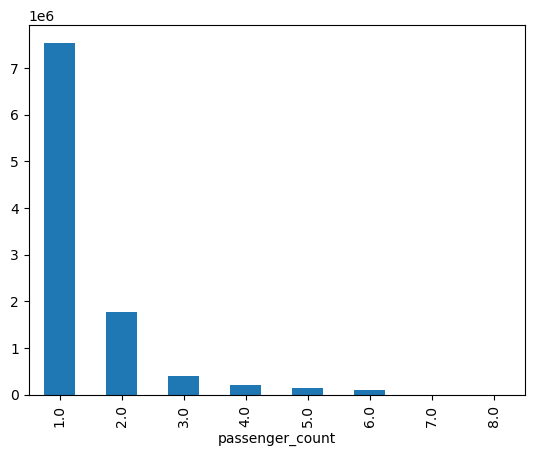

In [156]:
passenger_trip_distance.plot(kind="bar")

In [157]:
passenger_trip_distance_vendor = df.groupby(["VendorID", "passenger_count"])["trip_distance"].sum()
print(passenger_trip_distance)

passenger_count
1.000   7548936.470
2.000   1775011.110
3.000    389719.160
4.000    204907.160
5.000    140099.460
6.000     91430.090
7.000        25.430
8.000        55.520
Name: trip_distance, dtype: float64


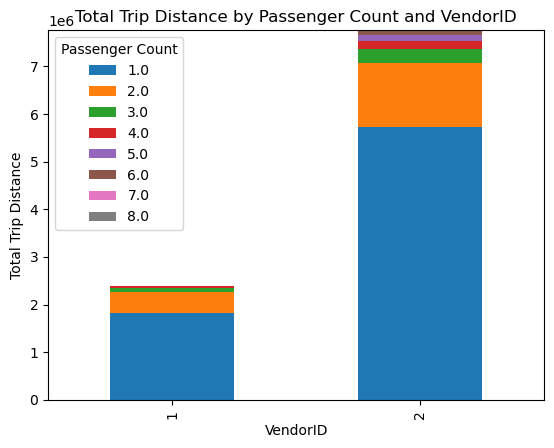

In [158]:
passenger_trip_distance_vendor.unstack().plot(kind="bar", stacked=True)
plt.xlabel("VendorID")
plt.ylabel("Total Trip Distance")
plt.title("Total Trip Distance by Passenger Count and VendorID")
plt.legend(title="Passenger Count")
plt.show()


Text(0, 0.5, 'Tip Amount')

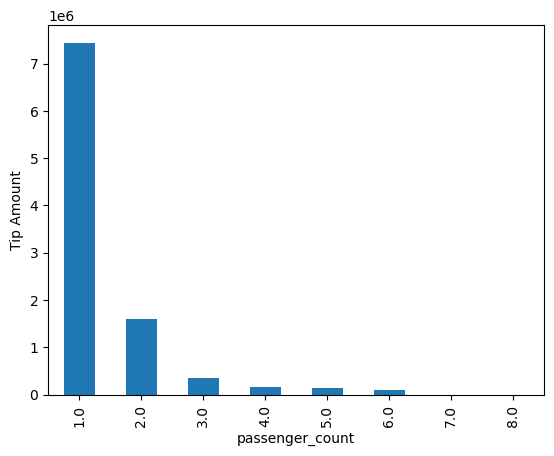

In [159]:
(df.groupby("passenger_count")["tip_amount"].sum()).plot(kind="bar")
plt.ylabel("Tip Amount")

In [107]:
(df.groupby("passenger_count")["tip_amount"].sum())

passenger_count
1.000   7442850.620
2.000   1603746.250
3.000    354258.950
4.000    170351.680
5.000    144116.060
6.000     94031.480
7.000        56.820
8.000        64.510
Name: tip_amount, dtype: float64

In [160]:
df = df[df["total_amount"]>0]

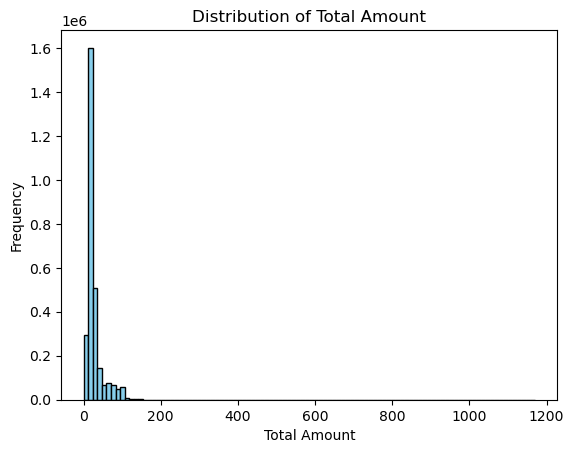

In [167]:
plt.hist(df["total_amount"], bins=100, color='skyblue', edgecolor='black')
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Total Amount")
plt.show()

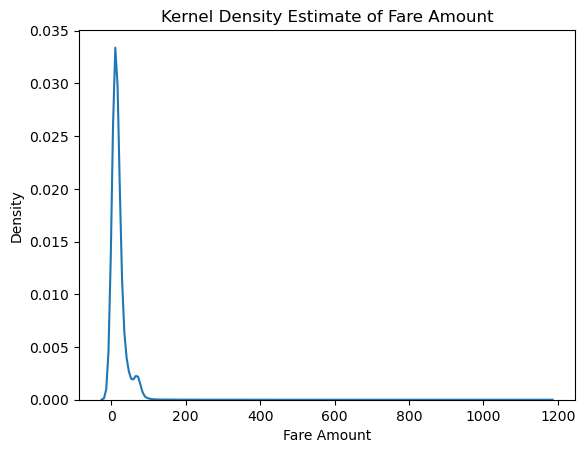

In [164]:
sns.kdeplot(df["fare_amount"], bw_method=0.5)  # Adjust the bandwidth as needed
plt.xlabel("Fare Amount")
plt.ylabel("Density")
plt.title("Kernel Density Estimate of Fare Amount")
plt.show()

## How does the distribution of trip distances vary between different vendors?

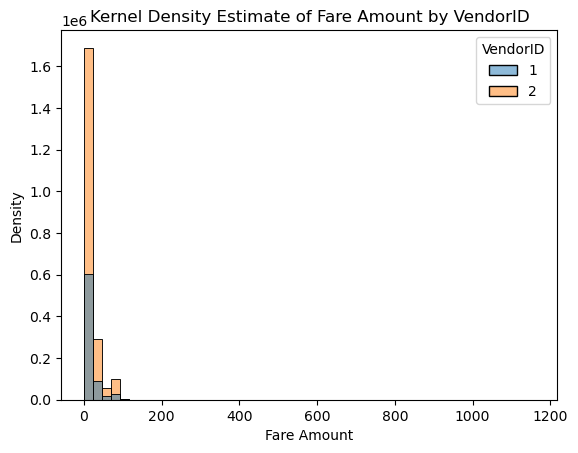

In [177]:
# Define custom color palette
colors = ["#1f77b4", "#ff7f0e"]  # Blue and orange

# Plotting KDE plot for fare_amount based on VendorID with customized color palette and bandwidth
sns.histplot(data=df, x="fare_amount", hue="VendorID", palette=colors,bins=50)
plt.xlabel("Fare Amount")
plt.ylabel("Density")
plt.title("Kernel Density Estimate of Fare Amount by VendorID")
plt.show()

## How does the total amount vary based on the payment type?

In [178]:
payement_type_amount = df.groupby("payment_type")["total_amount"].mean()

<Axes: xlabel='payment_type'>

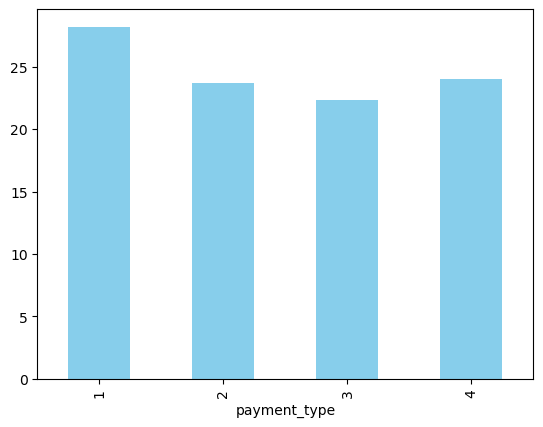

In [179]:
payement_type_amount.plot(kind="bar",color="skyblue")

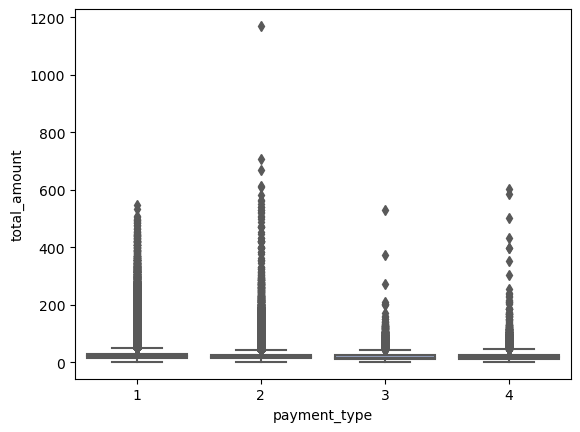

In [181]:
sns.boxplot(data=df,x="payment_type",y="total_amount",palette="Set2")
plt.show()

## Is there a correlation between trip distance and fare amount?

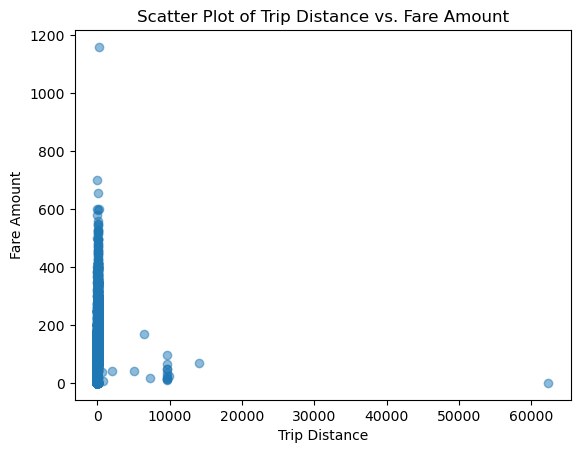

In [182]:
plt.scatter(df["trip_distance"], df["fare_amount"], alpha=0.5)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Scatter Plot of Trip Distance vs. Fare Amount")
plt.show()

In [187]:
correlation = df["trip_distance"].corr(df["fare_amount"])

In [188]:
correlation

0.09992274103965634

## How does the fare amount vary depending on the passenger count?

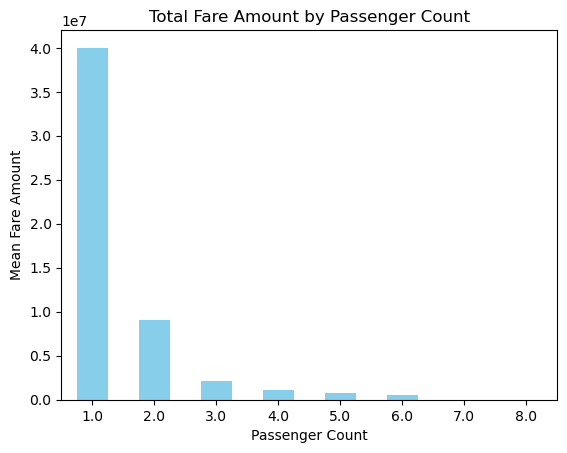

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean fare amount for each passenger count
mean_fare_amount_by_passenger_count = df.groupby("passenger_count")["fare_amount"].sum()

# Plotting bar plot for mean fare amount based on passenger count
mean_fare_amount_by_passenger_count.plot(kind="bar", color="skyblue")
plt.xlabel("Passenger Count")
plt.ylabel("Mean Fare Amount")
plt.title("Total Fare Amount by Passenger Count")
plt.xticks(rotation=0)
plt.show()

## What is the distribution of the number of passengers per trip?

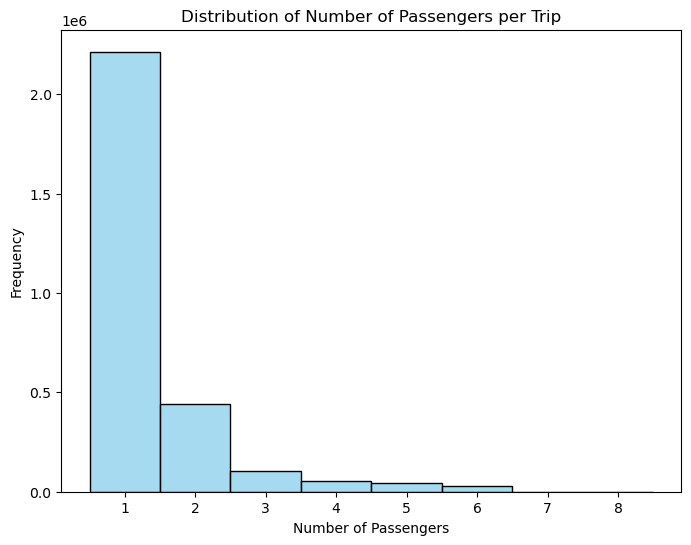

In [199]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="passenger_count", bins=range(1, int(df["passenger_count"].max() + 2)), discrete=True, color="skyblue", edgecolor="black")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Passengers per Trip")
plt.show()

## How does the total amount vary based on the day of the week?

In [212]:
df["day_of_the_week"] =  df["tpep_pickup_datetime"].dt.dayofweek

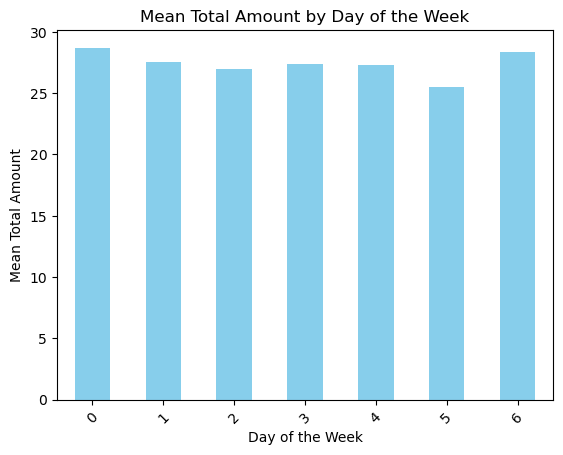

In [215]:
# Calculate mean total amount for each day of the week
mean_total_amount_by_day = df.groupby("day_of_the_week")["total_amount"].mean()
mean_total_amount_by_day.plot(kind="bar", color="skyblue")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Total Amount")
plt.title("Mean Total Amount by Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [216]:
mean_total_amount_by_day

day_of_the_week
0   28.708
1   27.496
2   26.930
3   27.357
4   27.258
5   25.501
6   28.349
Name: total_amount, dtype: float64

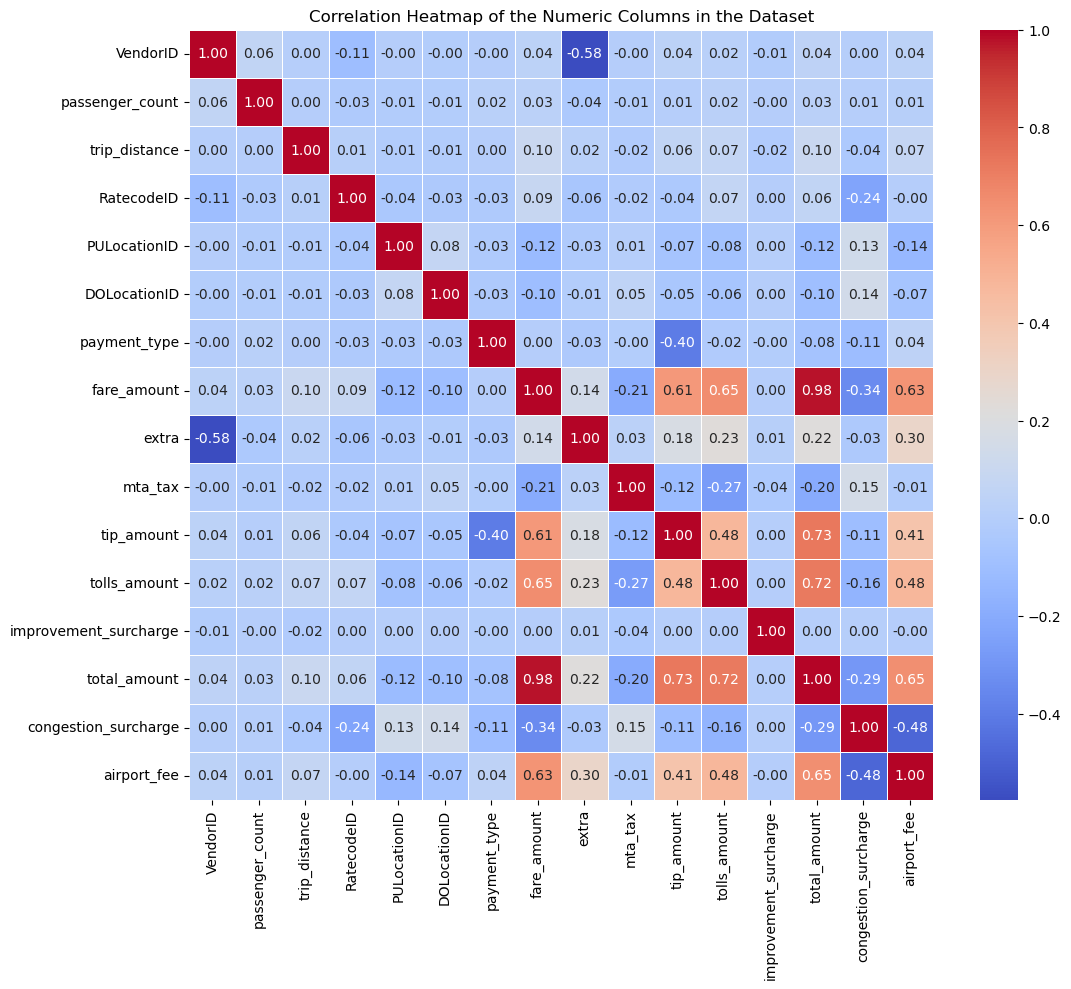

In [221]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of the Numeric Columns in the Dataset")
plt.show()